# Section_5 如何对不同选股方案进行组合(股票多策略)？

### 读取选股结果

In [1]:
import pandas as pd

strategy1 = pd.read_excel('divert_opt_quantile_5.xlsx').set_index("trade_date")
strategy2 = pd.read_excel('equal_weight_quantile_5.xlsx').set_index("trade_date")

strategy1.head()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
20140106,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
20140107,0,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20140108,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20140109,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### 为不同的选股方案设置不同的权重偏好，从而控制组合选股结果。以下以等权取交并集为例

In [2]:
import numpy as np

combined_result = 1*strategy1.replace(np.nan,0)+1*strategy2.replace(np.nan,0)

### 取交集

In [3]:
Intersection = combined_result[combined_result==2].fillna(0).replace(2,1)
Intersection.head()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140107,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140108,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 取并集

In [4]:
Union = combined_result[combined_result>0].fillna(0)
Union[Union>0] = 1
Union.head()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000012.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,...,601992.SH,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603699.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20140103,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140106,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140107,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140108,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20140109,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 测试策略组合效果

In [5]:
from jaqs_fxdayu.data import DataView 
import warnings
import numpy as np

warnings.filterwarnings("ignore")
dataview_folder = './Factor'
dv = DataView()
dv.load_dataview(dataview_folder)

def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = ~(df_index_member >0) #定义信号过滤条件-非指数成分
    return mask_index_member

def limit_up_down():
    # 定义可买卖条件——未停牌、未涨跌停
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == u'停牌'
    # 涨停
    dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False, add_data=True)
    # 跌停
    dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False, add_data=True)
    can_enter = np.logical_and(dv.get_ts('up_limit') < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(dv.get_ts('down_limit') < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

mask = mask_index_member()
can_enter,can_exit = limit_up_down()

Dataview loaded successfully.


In [6]:
dv.append_df(field_name="Union",df=Union,is_quarterly=False)
dv.append_df(field_name="Intersection",df=Intersection,is_quarterly=False)

In [7]:
from jaqs_fxdayu.research import SignalDigger
import matplotlib.pyplot as plt
from jaqs_fxdayu.research.signaldigger.analysis import analysis

obj = SignalDigger(output_folder='./output',
                   output_format='pdf')

def draw_analysis(signal="Union",benchmark_price=None):
    obj.process_signal_before_analysis(signal=dv.get_ts(signal),
                                       price=dv.get_ts("close_adj"),
                                       high=dv.get_ts("high_adj"), # 可为空
                                       low=dv.get_ts("low_adj"),# 可为空
                                       n_quantiles=1,# quantile分类数
                                       mask=mask,# 过滤条件
                                       can_enter=can_enter,# 是否能进场
                                       can_exit=can_exit,# 是否能出场
                                       period=30,# 持有期
                                       benchmark_price=benchmark_price, # 基准价格 可不传入，持有期收益（return）计算为绝对收益
                                       commission = 0.0008,
                                       )
    print(analysis(obj.signal_data,is_event=True,period=30))
    obj.create_full_report()
    plt.show()

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
{'ret':                long_ret  long_short_ret  all_sample_ret
t-stat        29.505789        9.897261        7.570006
p-value        0.000000        0.000000        0.000000
skewness       1.933317        0.555441        1.563058
kurtosis      13.585921        3.734487       10.061591
Ann. Ret       0.094616        0.052518        0.014263
Ann. Vol       0.293989        0.056483        0.336234
Ann. IR        0.321837        0.929799        0.042421
occurance  67802.000000      915.000000   256877.000000, 'space':                  long_space  all_sample_space
Up_sp Mean         0.126223          0.128407
Up_sp Std          0.140752          0.144886
Up_sp IR           0.896775          0.886264
Up_sp Pct5         0.000000          0.000000
Up_sp Pct25        0.035608          0.035329
Up_sp Pct50        0.086255          0.086880
Up_sp Pct75        0.167223          0.171021
Up_sp Pct95        0.390235          0

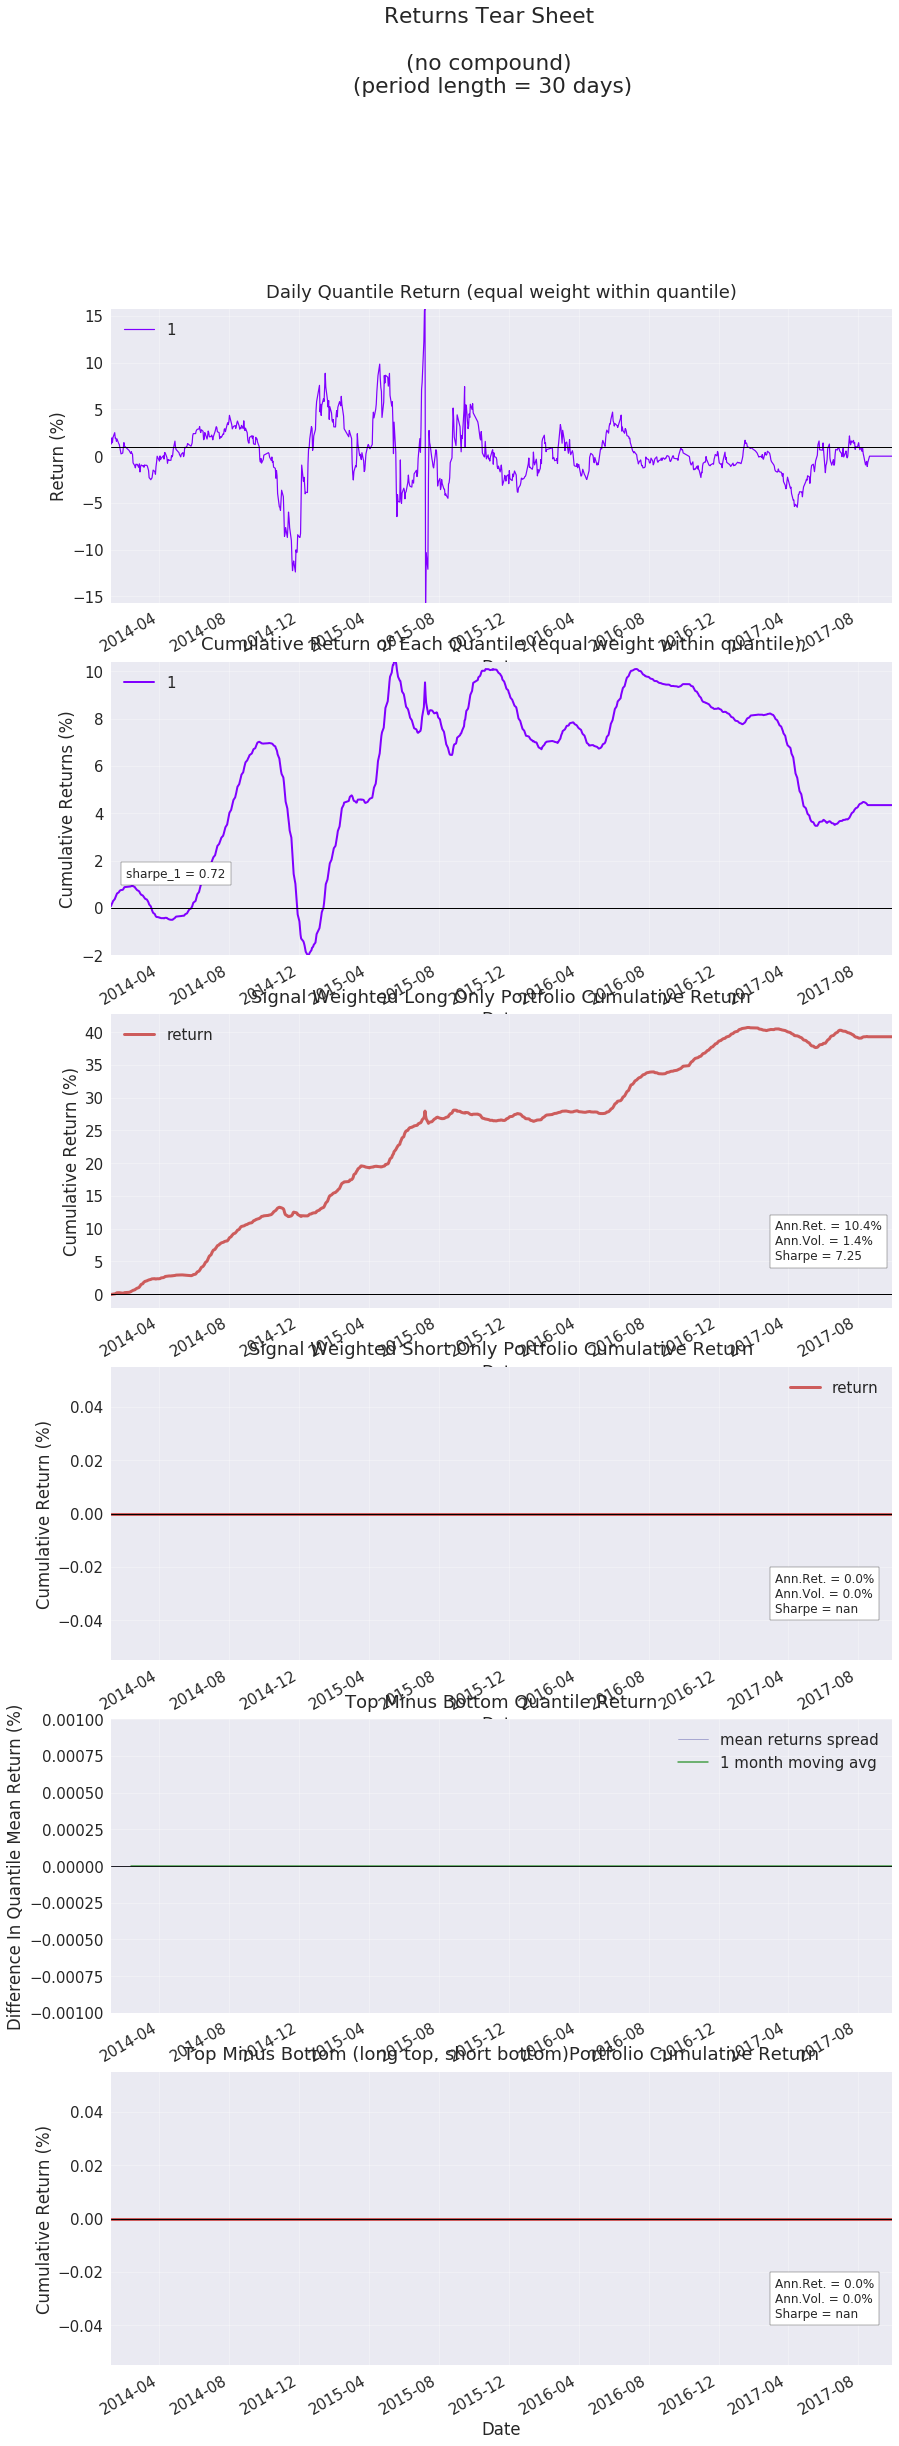

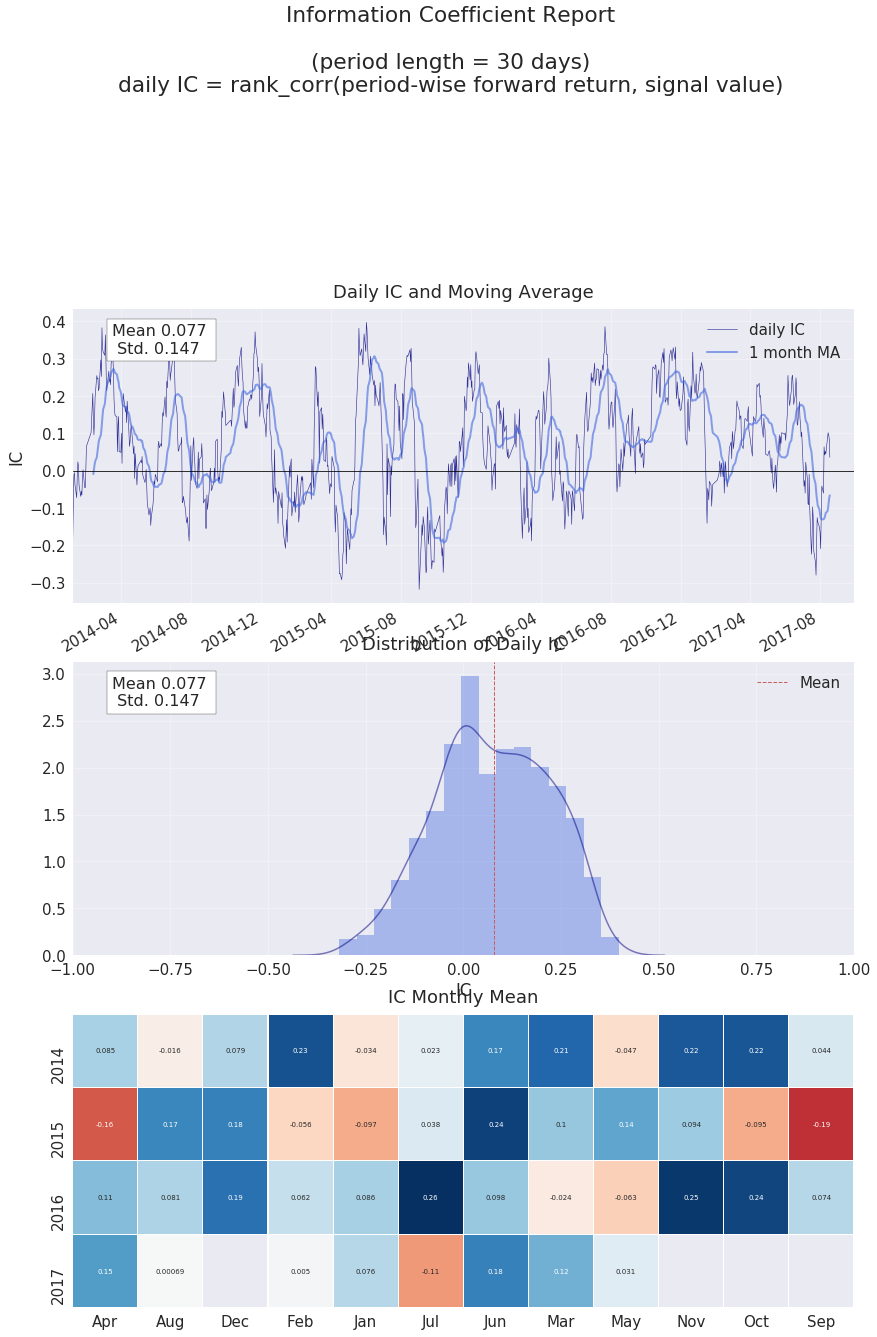

In [8]:
# 并集绩效 相对收益
draw_analysis('Union',dv.data_benchmark)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
{'ret':                long_ret  long_short_ret  all_sample_ret
t-stat        64.492280        9.933217       82.457439
p-value        0.000000        0.000000        0.000000
skewness       1.518563        0.575873        1.205233
kurtosis       8.858423        3.809283        7.216747
Ann. Ret       0.292424        0.052786        0.207705
Ann. Vol       0.415697        0.056565        0.449501
Ann. IR        0.703456        0.933177        0.462078
occurance  67802.000000      915.000000   256877.000000, 'space':                  long_space  all_sample_space
Up_sp Mean         0.126223          0.128407
Up_sp Std          0.140752          0.144886
Up_sp IR           0.896775          0.886264
Up_sp Pct5         0.000000          0.000000
Up_sp Pct25        0.035608          0.035329
Up_sp Pct50        0.086255          0.086880
Up_sp Pct75        0.167223          0.171021
Up_sp Pct95        0.390235          0

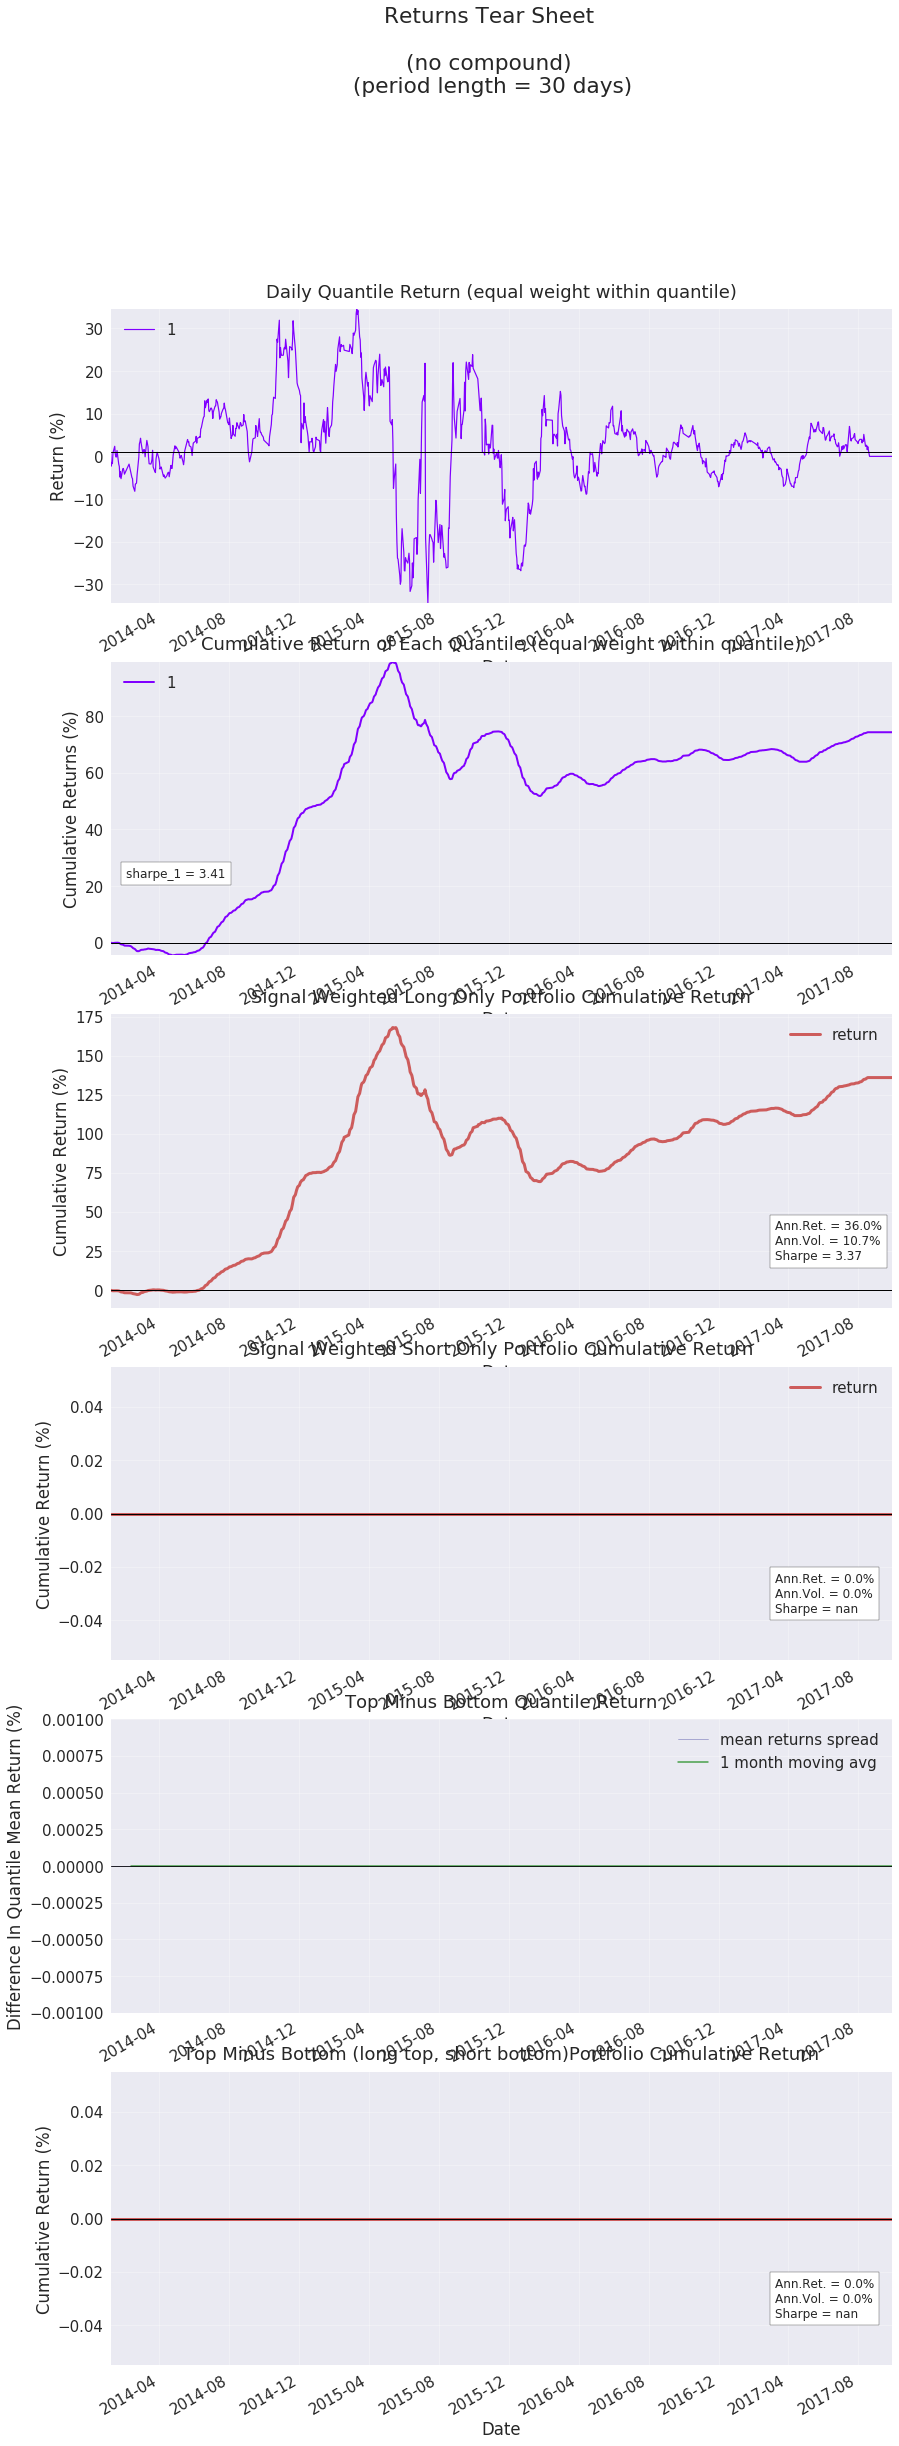

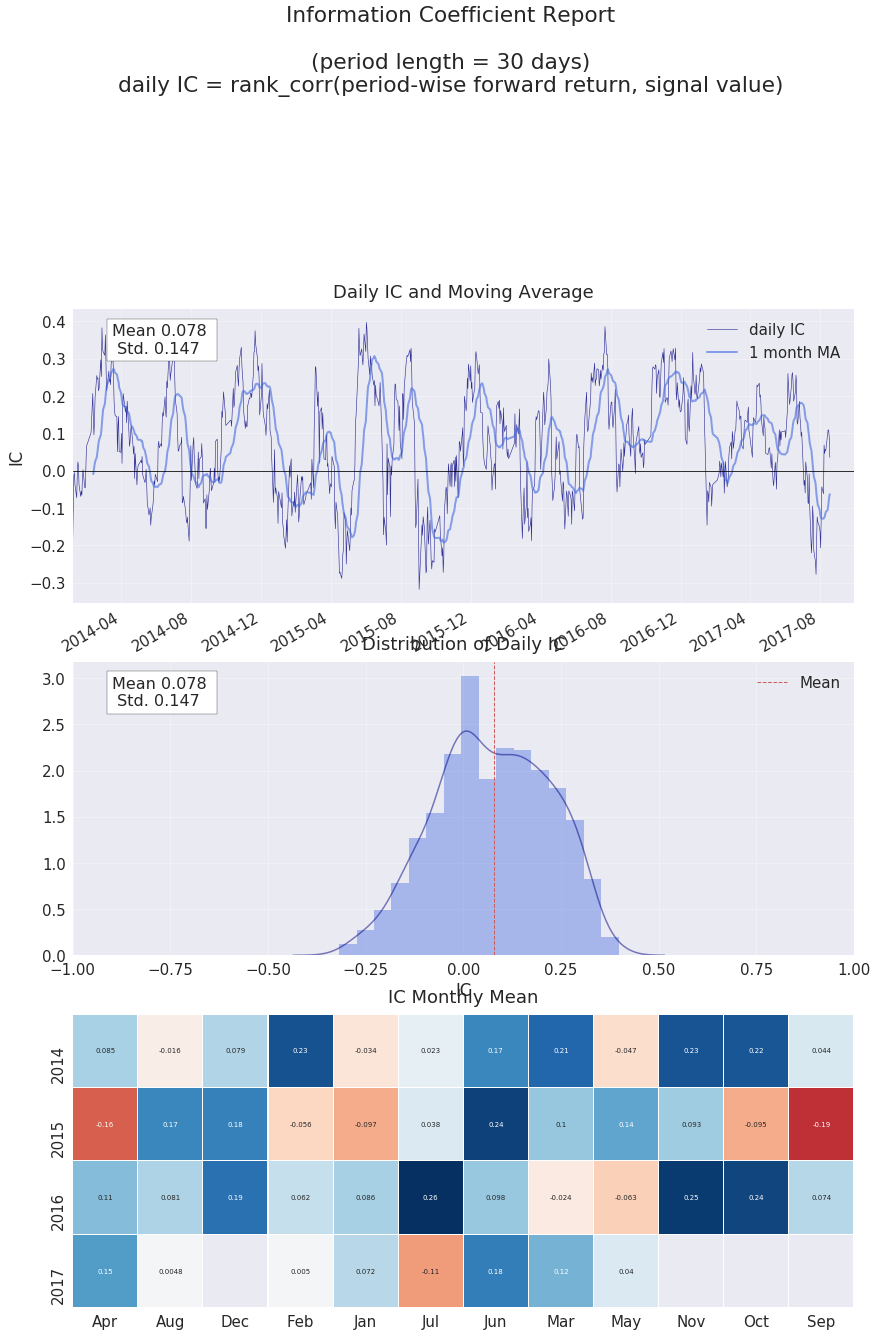

In [9]:
# 并集绩效 绝对收益
draw_analysis('Union',None)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
{'ret':                long_ret  long_short_ret  all_sample_ret
t-stat        17.138726        9.045112        7.570006
p-value        0.000000        0.000000        0.000000
skewness       1.962324        1.218376        1.563058
kurtosis      13.327837        4.170159       10.061591
Ann. Ret       0.128300        0.067791        0.014263
Ann. Vol       0.266718        0.079690        0.336234
Ann. IR        0.481034        0.850675        0.042421
occurance  10241.000000      913.000000   256877.000000, 'space':                  long_space  all_sample_space
Up_sp Mean         0.114700          0.128407
Up_sp Std          0.126737          0.144886
Up_sp IR           0.905027          0.886264
Up_sp Pct5         0.000000          0.000000
Up_sp Pct25        0.033609          0.035329
Up_sp Pct50        0.078645          0.086880
Up_sp Pct75        0.151099          0.171021
Up_sp Pct95        0.357282          0

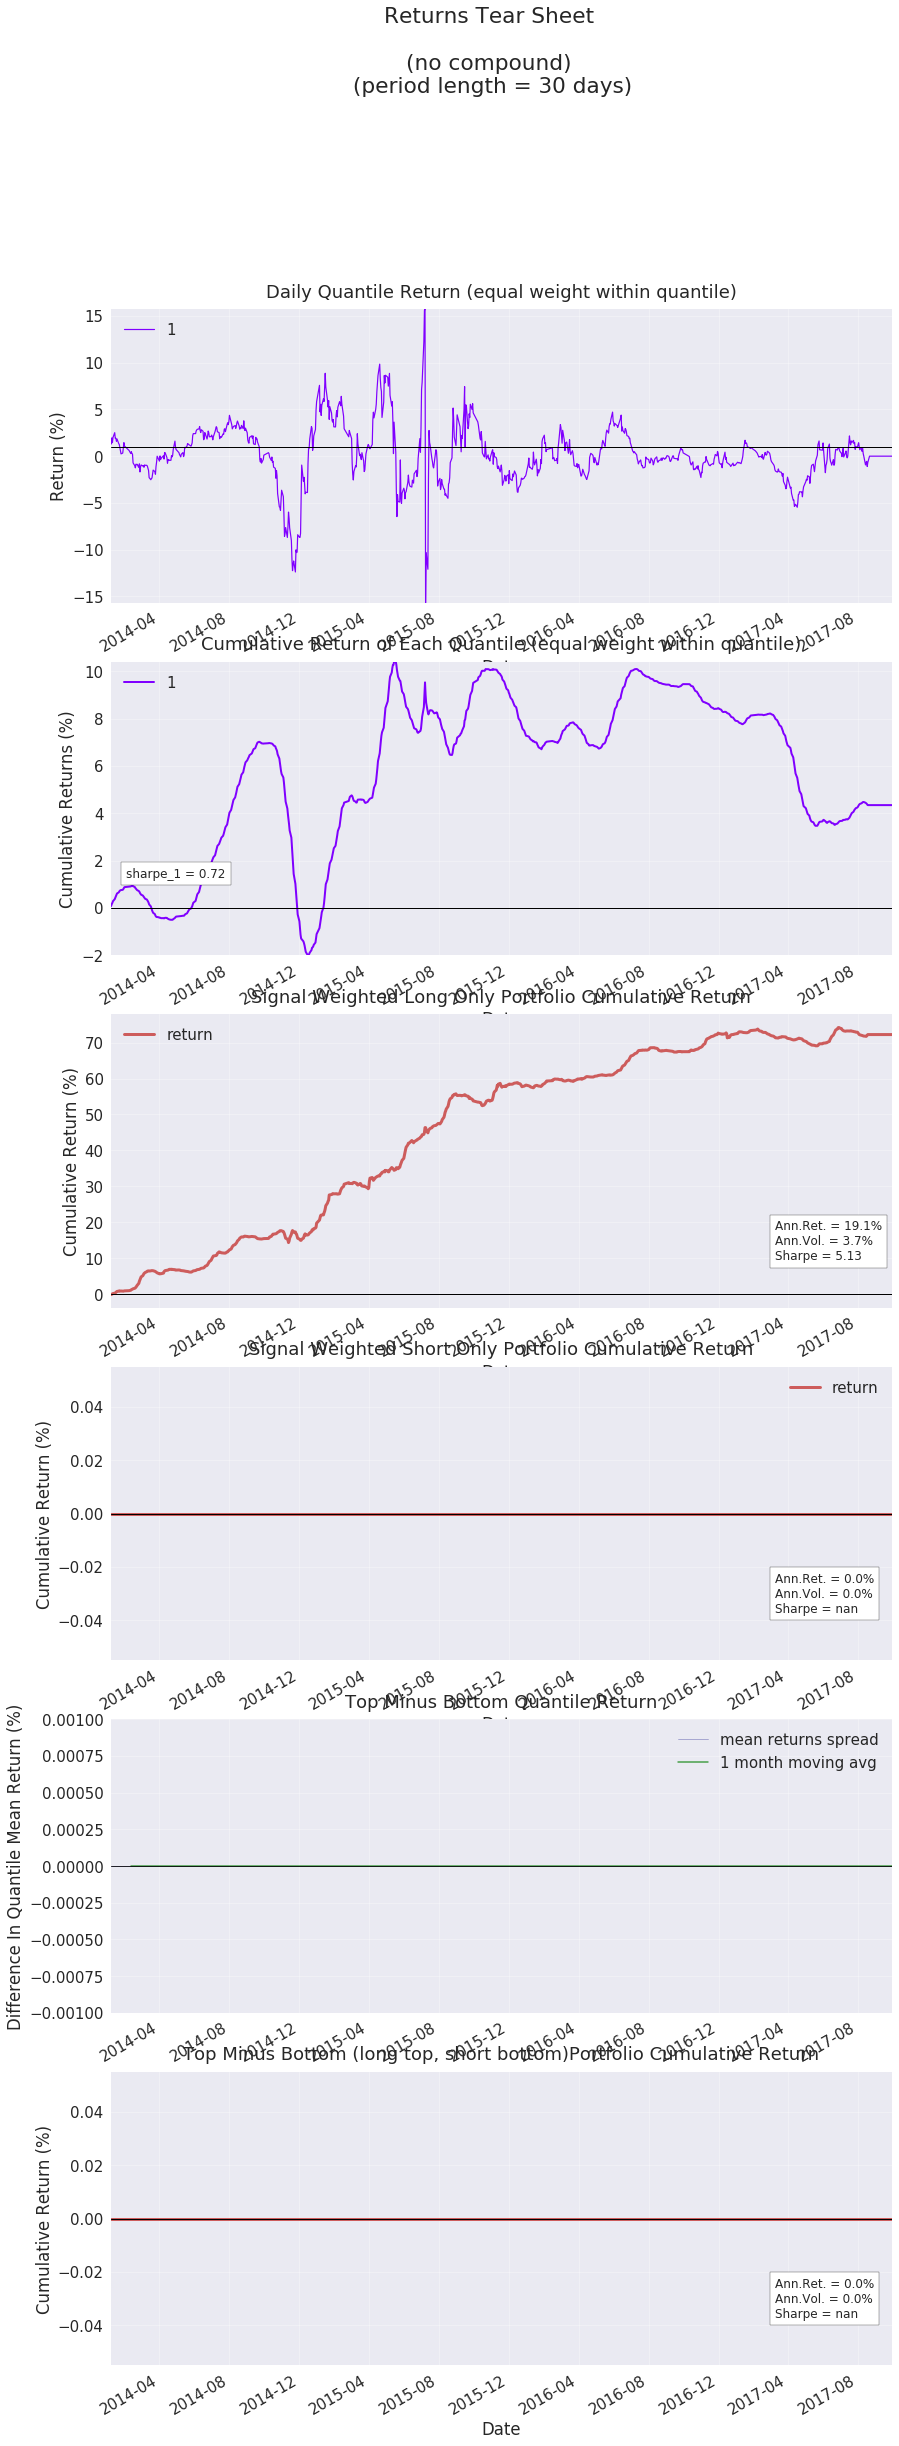

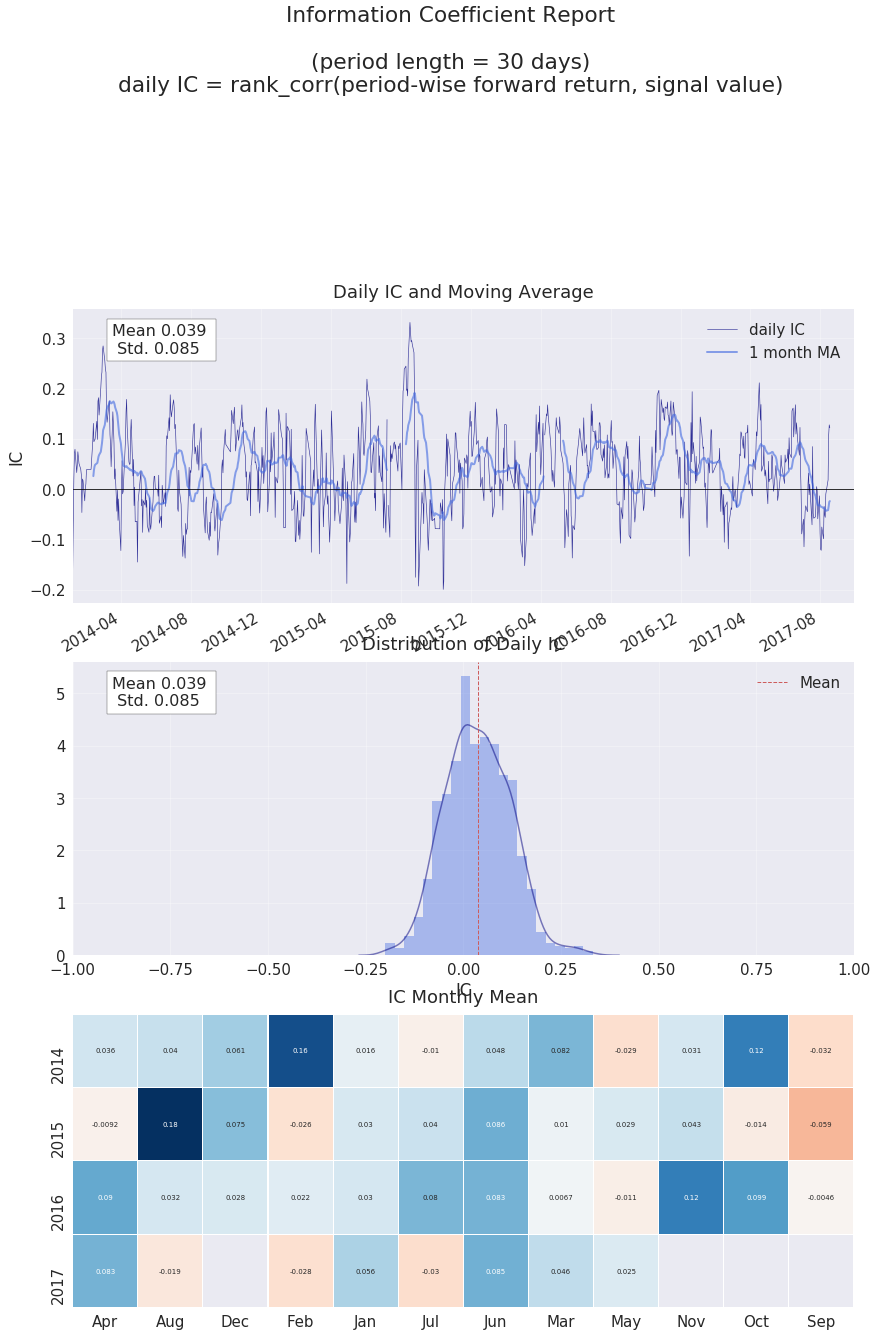

In [10]:
# 交集绩效 相对收益
draw_analysis('Intersection',dv.data_benchmark)

Nan Data Count (should be zero) : 0;  Percentage of effective data: 59%
{'ret':                long_ret  long_short_ret  all_sample_ret
t-stat        31.493033        9.084742       82.457439
p-value        0.000000        0.000000        0.000000
skewness       1.742077        1.225597        1.205233
kurtosis       9.888569        4.196702        7.216747
Ann. Ret       0.323998        0.068093        0.207705
Ann. Vol       0.366548        0.079696        0.449501
Ann. IR        0.883917        0.854402        0.462078
occurance  10241.000000      913.000000   256877.000000, 'space':                  long_space  all_sample_space
Up_sp Mean         0.114700          0.128407
Up_sp Std          0.126737          0.144886
Up_sp IR           0.905027          0.886264
Up_sp Pct5         0.000000          0.000000
Up_sp Pct25        0.033609          0.035329
Up_sp Pct50        0.078645          0.086880
Up_sp Pct75        0.151099          0.171021
Up_sp Pct95        0.357282          0

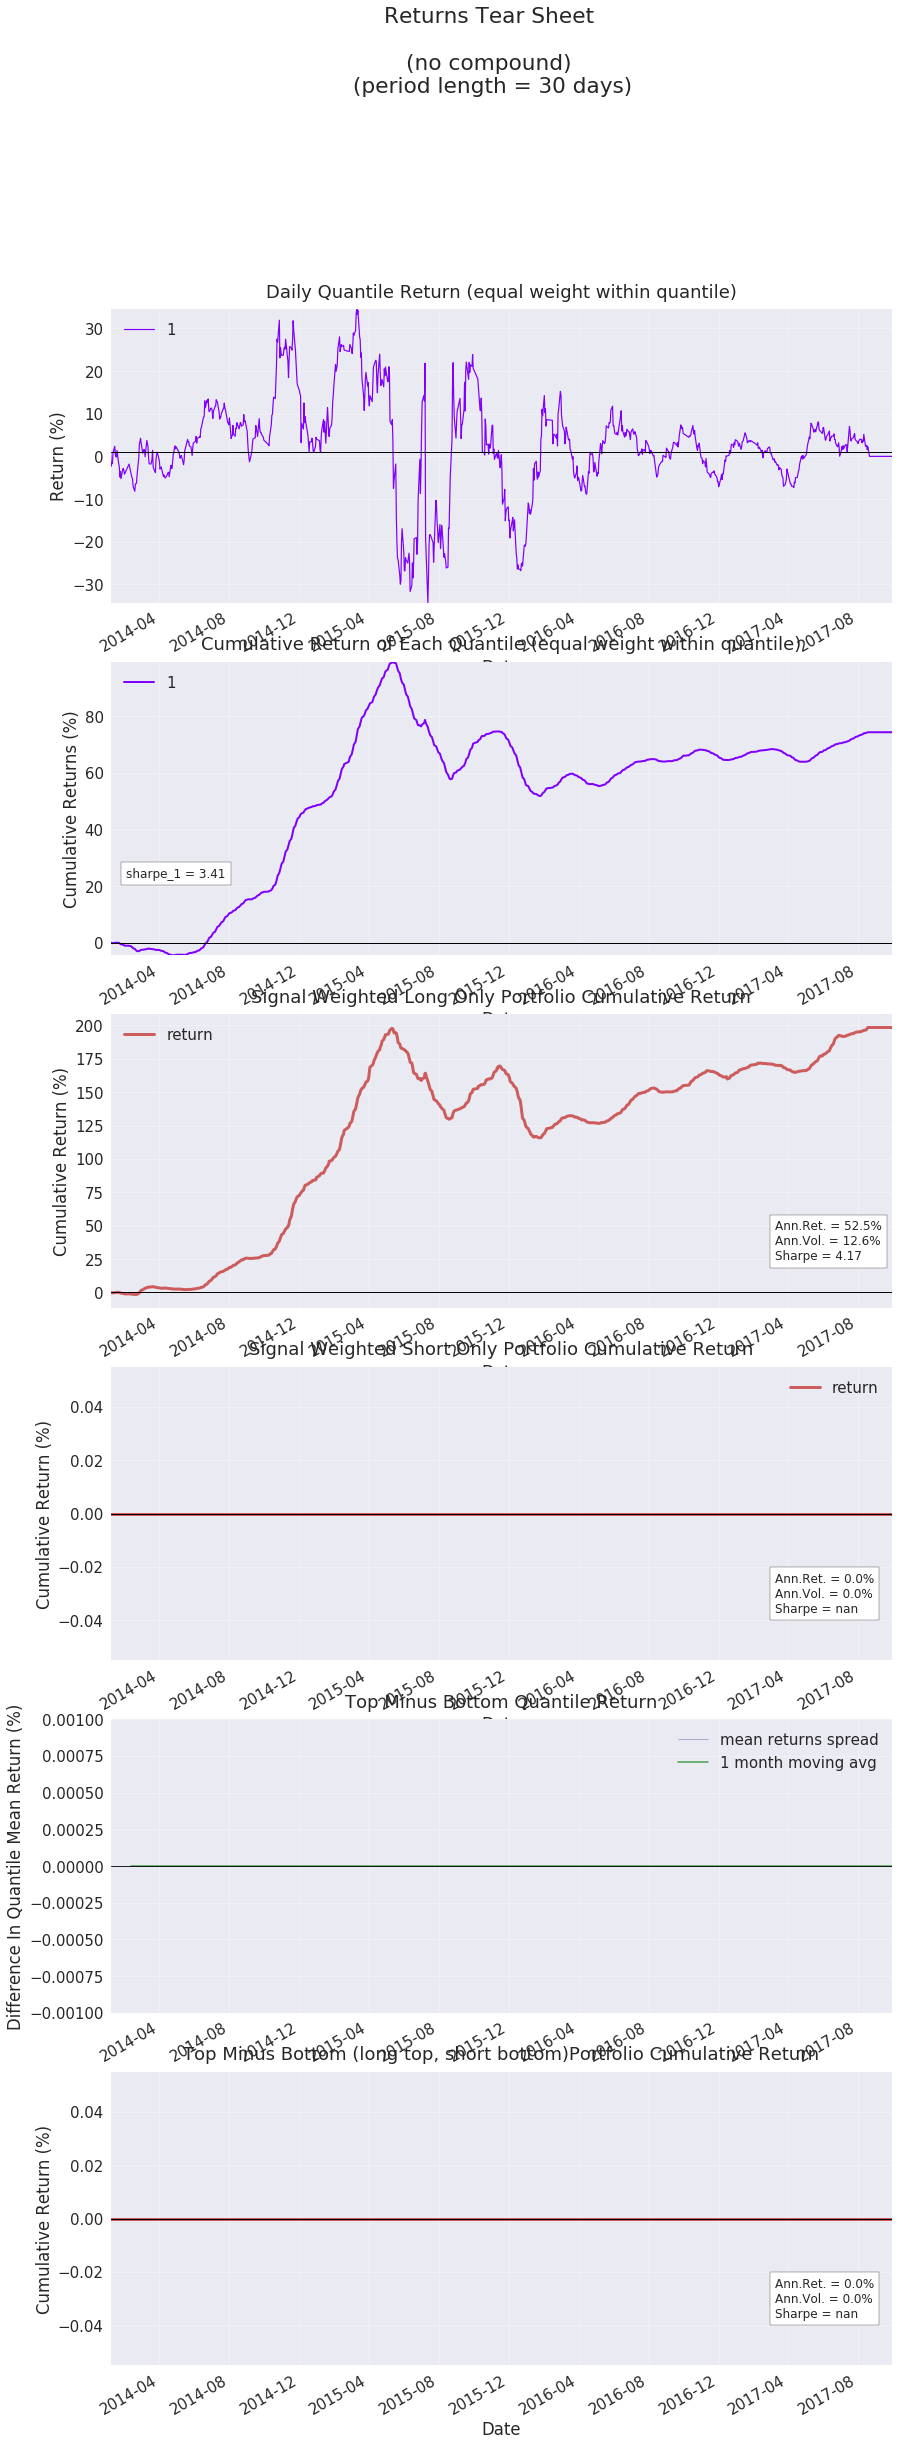

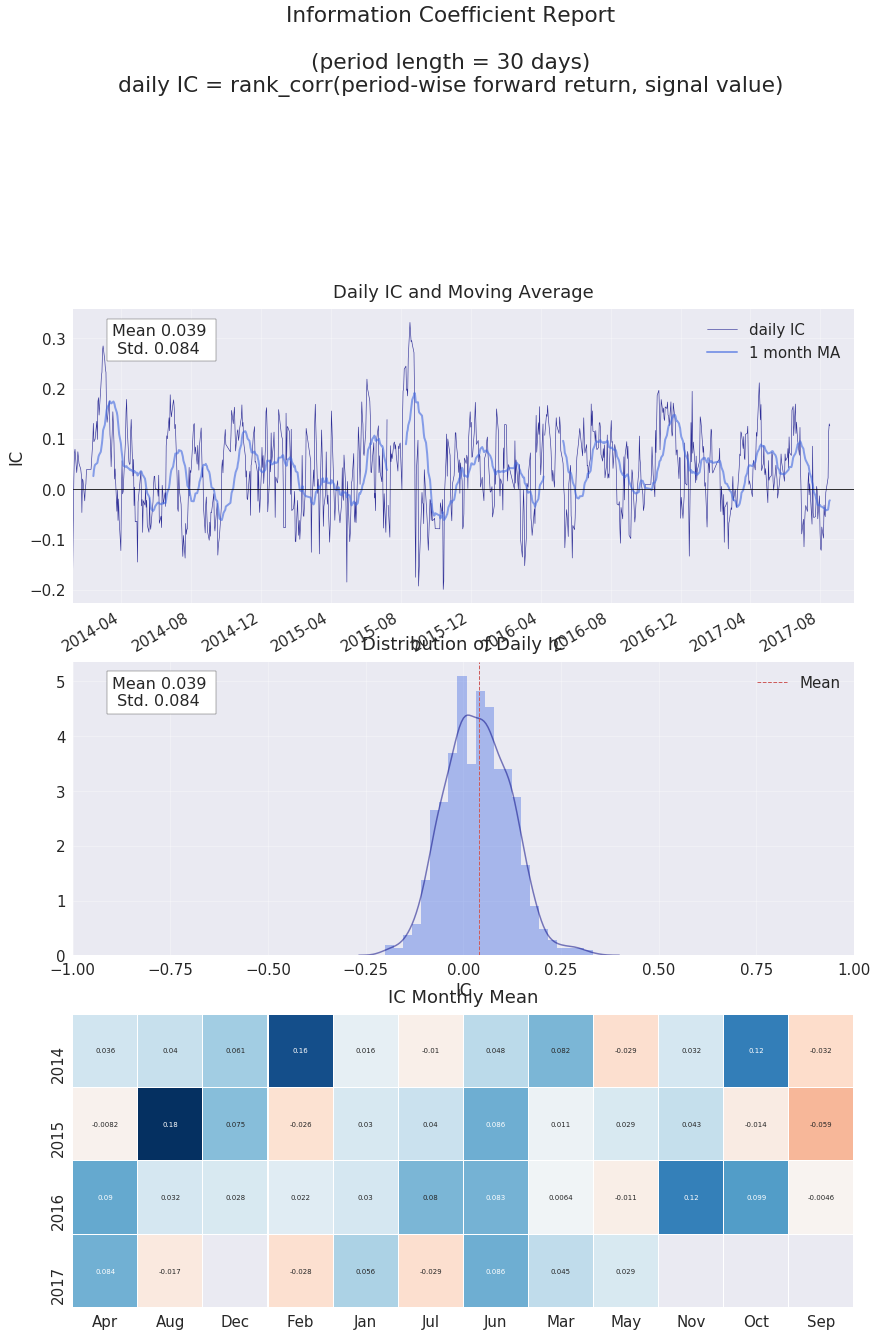

In [11]:
# 交集绩效 绝对收益
draw_analysis('Intersection',None)

In [12]:
Intersection.to_excel('./Intersection.xlsx')
Union.to_excel('./Union.xlsx')